## Lista de exercícios - 009

### Francisco Romes da Silva Filho, 409976

instalar biblioteca: !pip install mlxtend

Montando o drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Imports de bibliotecas

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [3]:
import warnings
warnings.filterwarnings("ignore")

### Dataset

In [4]:
# Pima Indians Diabetes Database
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/diabetes.csv')
print("Forma do dataset: ", data.shape[1], " features e ", data.shape[0], " amostras!")

Forma do dataset:  9  features e  768  amostras!


In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 1. Separe os dados em treino (80%) e teste (20%).

In [6]:
X = data.drop(['Outcome'], axis=1)
y = data['Outcome']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

## 2. Crie e avalie modelos usando kNN, Logistic Regression, SVM e Naive Bayes. Aplique um Grid Search com Validação Cruzada (CV) com k=5 no k-Fold sobre o conjunto de treino. A métrica de avaliação usada deve ser a métrica F1-Score. Teste diferentes hiperparâmetros. Escolha o melhor algoritmo e hiperparâmetros baseado no Grid Search.

In [8]:
hyperparameters = [\
                 {\
                  'classifier': [KNeighborsClassifier()],
                  'classifier__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
                  'classifier__weights': ['distance', 'uniform'],
                  'classifier__metric':['euclidean', 'manhattan', 'chebyshev', 'minkowski']},
                 {\
                  'classifier': [LogisticRegression()],
                  'classifier__penalty': ['l1', 'l2'],
                  'classifier__C': np.logspace(0, 4, 10),
                  'classifier__solver':['lbfgs', 'liblinear', 'saga']
                 }, 
                 {\
                  'classifier': [svm.SVC()],
                  'classifier__C': [1, 10, 100, 1000],
                  'classifier__gamma':[1, 0.1, 0.01, 0.001]
                 },   
                {\
                 'classifier': [GaussianNB()],
                 'classifier__var_smoothing': np.logspace(0,-9, num=100)
                }
                ]

In [9]:
hyperparameters

[{'classifier': [KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                        metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                        weights='uniform')],
  'classifier__metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
  'classifier__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
  'classifier__weights': ['distance', 'uniform']},
 {'classifier': [LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                      intercept_scaling=1, l1_ratio=None, max_iter=100,
                      multi_class='auto', n_jobs=None, penalty='l2',
                      random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                      warm_start=False)],
  'classifier__C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
         5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
         3.59381366e+03, 1.00000000e+04]),
  'classifier__penalty': ['l1', 'l2'],

In [10]:
pipe = Pipeline([('classifier', KNeighborsClassifier())])


In [11]:
clf = GridSearchCV(estimator=pipe, param_grid=hyperparameters, scoring='f1', cv=5, verbose=0, n_jobs=-1)


In [12]:
best_model = clf.fit(X_train, y_train)

In [13]:
best_model.best_estimator_.get_params()['classifier']


LogisticRegression(C=7.742636826811269, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## 3. Treine um novo modelo usando o melhor resultado do Grid Search sobre todos os dados de treino (80% do dataset).   


In [14]:
model = LogisticRegression(C=7.742636826811269, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
model.fit(X_train, y_train)

LogisticRegression(C=7.742636826811269, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
model.score(X_train, y_train)

0.7801302931596091

In [17]:
model_pred = model.predict(X_test)

## 4. Avalie o modelo usando a métrica F1-Score sobre os dados de teste.


In [18]:
f1_score(y_test, model_pred)

0.6526315789473683

## 5. Desenhe as regiões de decisão em 2D. As regiões devem se basear nos dados de treino (80% do dataset). O gráfico deve mostrar os dados de teste (20% do dataset). Dica: transforme as features em 2D usando a técnica PCA (Principal Component Analysis), conforme mostramos em aula e no Jupyter Notebook que disponibilizamos.

In [19]:
y = np.array(y)

In [20]:
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X)

In [21]:
model.fit(X_2D, y)

LogisticRegression(C=7.742636826811269, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

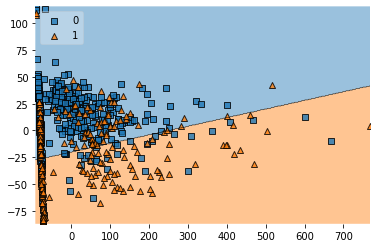

In [22]:
plot_decision_regions(X_2D, y, clf=model, legend=2)
plt.show()

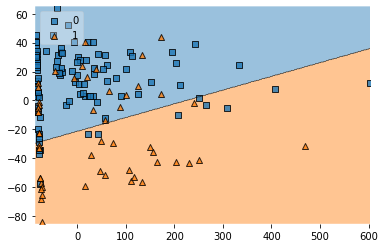

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_2D, y, test_size=0.2, stratify=y, random_state=0)
lr = LogisticRegression(C=7.742636826811269, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

lr.fit(X_train, y_train)
plot_decision_regions(X_test, y_test, clf=lr, legend=2)
plt.show()